In [306]:
#Required Libaries
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve, roc_auc_score

## Data Spliting

In [257]:
#Loading data and generating a data frame
data_path = "../data/preprocessed-healthcare-dataset-stroke-data.csv"

#Getting rid of the first column, containing previous indexes
stroke_df = pd.read_csv(data_path, index_col=0)
stroke_df.reset_index(drop=True, inplace=True)

In [258]:
stroke_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender _Male,gender _Other,ever_married _Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type _Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
1,53882,74.0,1,1,70.09,27.400000,1,1,0,1,0,1,0,0,0,0,1,0
2,10434,69.0,0,0,94.39,22.800000,1,0,0,0,0,1,0,0,1,0,1,0
3,27419,59.0,0,0,76.15,27.811992,1,0,0,1,0,1,0,0,0,0,0,0
4,60491,78.0,0,0,58.57,24.200000,1,0,0,1,0,1,0,0,1,0,0,0


In [259]:
#Storing Target Variable
target = stroke_df.stroke
input = stroke_df.drop(["stroke","id"], axis = 'columns')

In [260]:
#spliting Data Set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(input, target,test_size=0.2, random_state=22)

In [261]:
#Normalizing Data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [262]:
#Fixing Unbalanced data
sm = SMOTE(random_state =2)
smote_X_train, smote_Y_train =  sm.fit_resample(X_train_norm, Y_train)

In [263]:
# Print the oversampling results
print("\n\t Post OverSampling, the shape of diver_X: {}".format(smote_X_train.shape))
print("\n\t Post OverSampling, the shape of diver_y:{}".format(smote_Y_train.shape))


	 Post OverSampling, the shape of diver_X: (6788, 16)

	 Post OverSampling, the shape of diver_y:(6788,)


In [264]:
#Checking if Data is blanced
print("Post OverSampling, label count '1': {}".format(sum(smote_Y_train == 1)))
print("Post OverSampling, label count '0': {}".format(sum(smote_Y_train == 0)))

Post OverSampling, label count '1': 3394
Post OverSampling, label count '0': 3394


### Logistic Regresion

In [265]:
#Using Sklearn Logistic regression
lr_clf = LogisticRegression()

In [303]:
#Fitting the logistic regression model
lr_clf.fit(smote_X_train,smote_Y_train)

LogisticRegression()

In [267]:
lr_Y_pred = lr.predict(X_test_norm)

### Naive Bayes, GaussianNB

In [268]:
NB_clf = GaussianNB()

In [304]:
#Fitting the Naive Bayes model
NB_clf.fit(smote_X_train,smote_Y_train)

GaussianNB()

In [270]:
NB_Y_pred = NB_clf.predict(X_test_norm)

### K Nearest Neighbor Classifier

In [271]:
KNN_clf = KNeighborsClassifier(n_neighbors=3)

In [305]:
#Fitting the KNN model
KNN_clf.fit(smote_X_train,smote_Y_train)

KNeighborsClassifier(n_neighbors=3)

In [273]:
KNN_Y_pred = KNN_clf.predict(X_test_norm)

/Users/Robin1/opt/anaconda3/envs/COMP_541/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Support Vector Machine Classifier model

In [274]:
 SVM_clf = svm.SVC(probability=True)

In [275]:
 SVM_clf.fit(smote_X_train,smote_Y_train)

SVC(probability=True)

In [276]:
SVM_Y_pred = SVM_clf.predict(X_test_norm)

### Testing acuracy of Models

In [277]:
#Function for ploting confusion matrix
def confusion_matrix_plot(clf_model,X_test, Y_test, title):
    predictions = clf_model.predict(X_test_norm)
    cm = confusion_matrix(Y_test, predictions, labels=clf_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

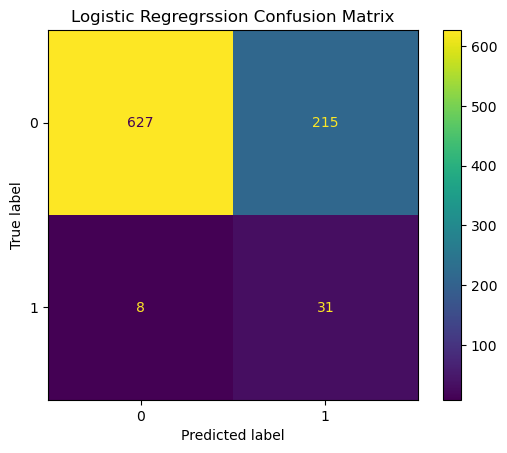

In [278]:
# Ploting Confusion Matrix for Logistic Regression Classifier
lr_title = "Logistic Regregrssion Confusion Matrix"
confusion_matrix_plot(lr_clf,X_test_norm, Y_test,lr_title)

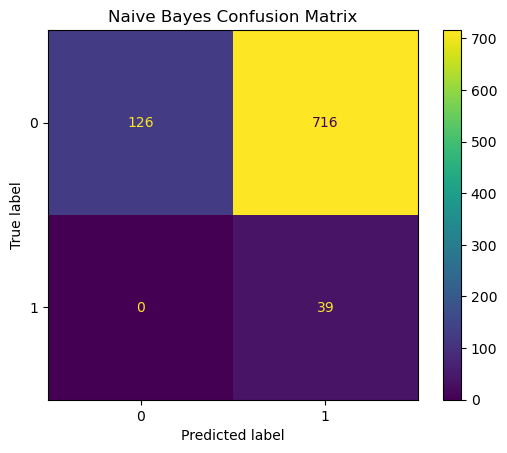

In [279]:
# Ploting Confusion Matrix for Naive Bayes Classifier
NB_title = "Naive Bayes Confusion Matrix"
confusion_matrix_plot(NB_clf,X_test_norm, Y_test,NB_title)

/Users/Robin1/opt/anaconda3/envs/COMP_541/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


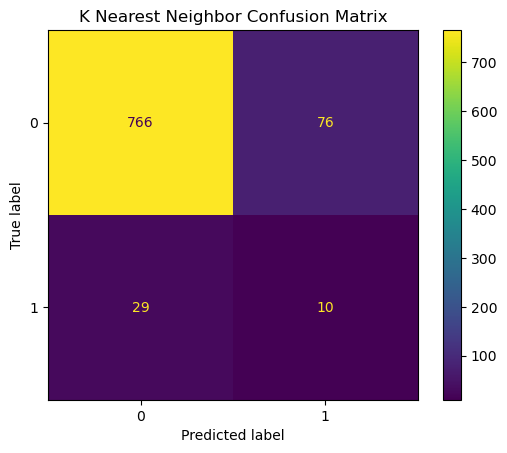

In [280]:
# Ploting Confusion Matrix for K Nearest Neighbor Classifier
KNN_title = "K Nearest Neighbor Confusion Matrix"
confusion_matrix_plot(KNN_clf,X_test_norm, Y_test,KNN_title)

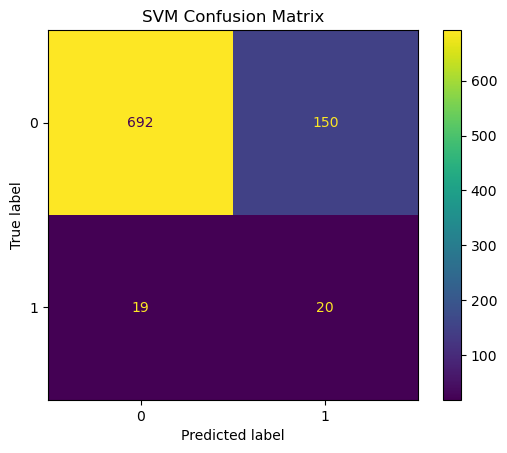

In [281]:
# Ploting Confusion Matrix for Naive Bayes Classifier
SVM_title = "SVM Confusion Matrix"
confusion_matrix_plot(SVM_clf,X_test_norm, Y_test,SVM_title)

In [282]:
# Displaying The Classification report for Logistic regression to find the F-score and Accuracy 
print(classification_report(Y_test, lr_Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79       842
           1       0.10      0.85      0.18        39

    accuracy                           0.67       881
   macro avg       0.55      0.75      0.49       881
weighted avg       0.95      0.67      0.77       881



In [283]:
# Displaying The Classification report for Naive Bayes to find the F-score and Accuracy 
print(classification_report(Y_test, NB_Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26       842
           1       0.05      1.00      0.10        39

    accuracy                           0.19       881
   macro avg       0.53      0.57      0.18       881
weighted avg       0.96      0.19      0.25       881



In [284]:
# Displaying The Classification report for KNN to find the F-score and Accuracy 
print(classification_report(Y_test, KNN_Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       842
           1       0.12      0.26      0.16        39

    accuracy                           0.88       881
   macro avg       0.54      0.58      0.55       881
weighted avg       0.93      0.88      0.90       881



In [285]:
# Displaying The Classification report for SVM to find the F-score and Accuracy 
print(classification_report(Y_test, SVM_Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       842
           1       0.12      0.51      0.19        39

    accuracy                           0.81       881
   macro avg       0.55      0.67      0.54       881
weighted avg       0.94      0.81      0.86       881



### Ploting AUC-ROC Curve

In [286]:
#Prediction Probabilities
r_probs = [0 for _ in range(len(Y_test))]
lr_probs = lr_clf.predict_proba(X_test_norm)
NB_probs = NB_clf.predict_proba(X_test_norm)
KNN_probs =KNN_clf.predict_proba(X_test_norm)
SVM_probs = SVM_clf.predict_proba(X_test_norm)
lr_probs

array([[0.12733782, 0.87266218],
       [0.95159452, 0.04840548],
       [0.96148609, 0.03851391],
       ...,
       [0.53019613, 0.46980387],
       [0.88554551, 0.11445449],
       [0.88621876, 0.11378124]])

In [287]:
#Storing Probabilities for the positive outcome
lr_probs = lr_probs[:,1]
NB_probs = NB_probs[:,1]
KNN_probs = KNN_probs[:,1]
SVM_probs = SVM_probs[:,1]

In [288]:
# Calculating ROC-AUC Score
r_auc = roc_auc_score(Y_test, r_probs)
lr_auc = roc_auc_score(Y_test,lr_probs)
NB_auc = roc_auc_score(Y_test, NB_probs)
KNN_auc = roc_auc_score(Y_test,  KNN_probs)
SVM_auc = roc_auc_score(Y_test,  SVM_probs)

In [289]:
#Printing ROC-AUC Scores
print("Roc-AUC score Random Prediction: ",r_auc)
print("Roc-AUC score Logistic Regression: ",lr_auc )
print("Roc-AUC score Naive Bayes: ",NB_auc)
print("Roc-AUC score KNN: ",KNN_auc)
print("Roc-AUC score SVM: ",SVM_auc)

Roc-AUC score Random Prediction:  0.5
Roc-AUC score Logistic Regression:  0.8395456483342469
Roc-AUC score Naive Bayes:  0.8203301053657348
Roc-AUC score KNN:  0.6004476521103599
Roc-AUC score SVM:  0.7502892989828857


In [290]:
# Calculating ROC-AUC Curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
lr_fpr, lr_tpr,_ = roc_curve(Y_test,lr_probs)
NB_fpr, NB_tpr,_= roc_curve(Y_test,  NB_probs)
KNN_fpr, KNN_tpr,_ = roc_curve(Y_test,  KNN_probs)
SVM_fpr, SVM_tpr,_ = roc_curve(Y_test,  SVM_probs)

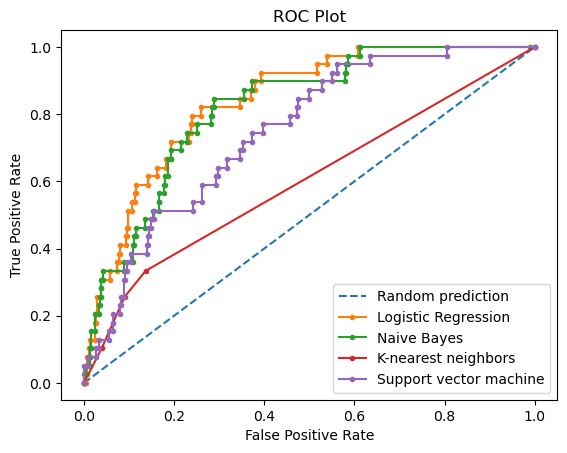

In [302]:
#Plot AUC-ROC  Curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction' )
plt.plot(lr_fpr, lr_tpr,marker='.', label='Logistic Regression')
plt.plot(NB_fpr, NB_tpr, marker='.', label='Naive Bayes')
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='K-nearest neighbors' )
plt.plot(SVM_fpr, SVM_tpr, marker='.', label='Support vector machine')


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

### Interpretation of results

- <font size = 4>  <strong> F-score and Accuracy 
    - <font size = 4> Logistic Regression: The accuracy for the LR model is 67% having a F-score of 0.18 for class 1 and a F-score 0.79 for class 0. While the model has high precision for class 0, it has low precision, and F1-score for class 1. <br> <br>
    - <font size = 4> Naive Bayes:  The accuracy for the NB model is low beeing 19% having a F-score of 0.10 for class 1 and a F-score 0.26 for class 0. The NB model performed inefficiently for both classes. <br> <br>
    - <font size = 4> KNN: The accuracy for the KNN model is 88%, and it has an F-score of 0.16 for class 1 and a F-score of 0.94 . While the model has high precision and a high F-score for class 0, it has low precision, and F-score for class 1. <br> <br>
    - <font size = 4> SVM: The accuracy for the SVM model is 81%, and it has an F-score of 0.19 for class 1 and a F-score of 0.89 for class 0. While the model has high precision and a high F-score for class 0, it has low precision, and F-score for class 1. The recall for both class 0 and class 1 is more balanced with the SVM model    
<br><br>
    
- <font size = 4>
  In general, KNN and the SVM have the highest accuracy among the four models. while both having the highest F1-score for class 0. However, all four models have relatively low F1-scores for class 1, indicating that they may not be very effective in identifying instances of that class. This problem can be do to the fact that our datasets testing data has more elements of class 0 than calss 1
    <br><br>
- <font size = 4> <strong> AUC-ROC Curve 
    - <font size = 4> The LR and NB models have the highest ROC-AUC scores of 0.84 and 0.82, respectively, indicating that they are better at distinguishing between positive and negative classes compared to the other two models. The SVM model has a moderate ROC-AUC score of 0.75, while the KNN model has the lowest score of 0.6, which suggests that it may not be as effective as the other models in differentiating between the two classes. The same can be concluded from the ROC Plot.